In [5]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

### Plot params

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range
num_classes = 10


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


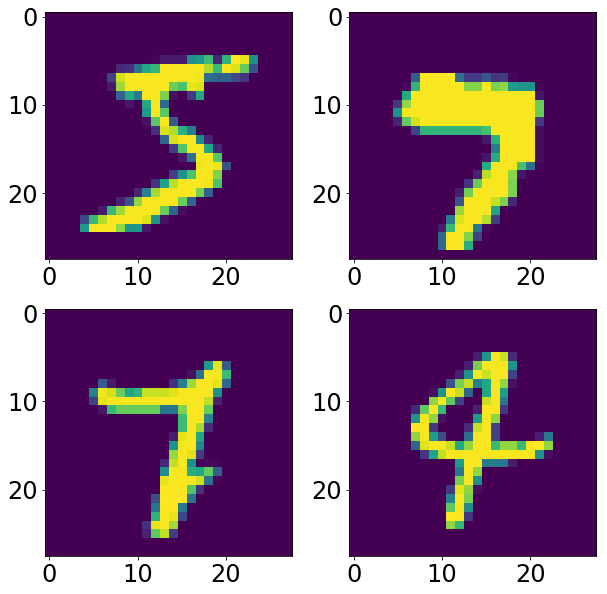

In [10]:
f = plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
ax.imshow(X_train[0].reshape([28, 28]))

ax = plt.subplot(2, 2, 2)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

ax = plt.subplot(2, 2, 3)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

ax = plt.subplot(2, 2, 4)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

plt.show()

In [11]:
batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 5 # we iterate twenty times over the entire training set
hidden_size = 128 # there will be 512 neurons in both hidden layers

In [12]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(60, (3, 3), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='Adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy


In [14]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 123s 3ms/step - loss: 0.7421 - acc: 0.7771 - val_loss: 0.2666 - val_acc: 0.9238
Epoch 2/5
42000/42000 [==============================] - 121s 3ms/step - loss: 0.2071 - acc: 0.9400 - val_loss: 0.1465 - val_acc: 0.9578
Epoch 3/5
42000/42000 [==============================] - 121s 3ms/step - loss: 0.1269 - acc: 0.9626 - val_loss: 0.1019 - val_acc: 0.9688
Epoch 4/5
42000/42000 [==============================] - 133s 3ms/step - loss: 0.0953 - acc: 0.9717 - val_loss: 0.0928 - val_acc: 0.9721
Epoch 5/5
42000/42000 [==============================] - 146s 3ms/step - loss: 0.0762 - acc: 0.9783 - val_loss: 0.0710 - val_acc: 0.9788


In [15]:
model.evaluate(X_test,y_test, verbose=1)

10000/10000 [==============================] - 20s 2ms/step


[0.059776836876943705, 0.9804]

## Draw Plots of errors

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


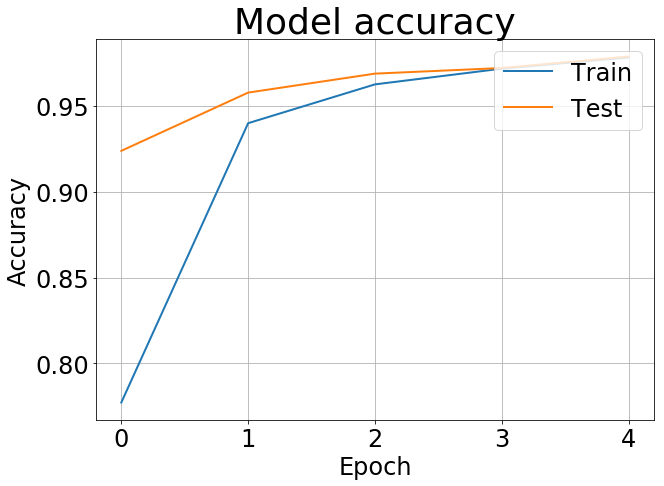

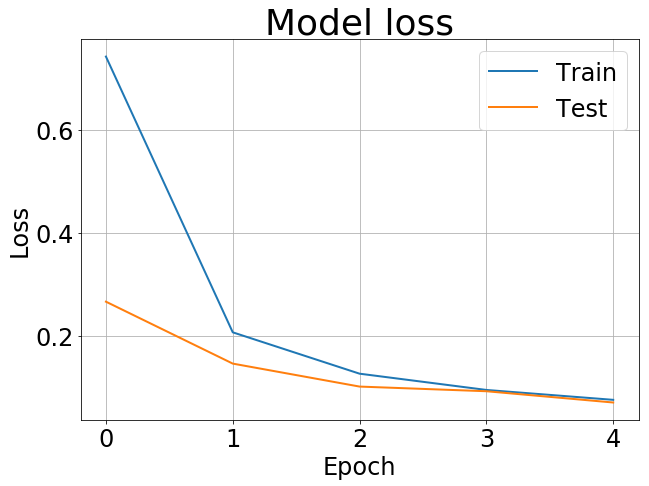

In [16]:
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

## Кривые обучения

In [17]:
set_sizes = np.arange(1000, 10000, 1000)
set_sizes = np.hstack((set_sizes, list(range(10, 100, 10))))
set_sizes = np.hstack((set_sizes, list(range(100, 1000, 100))))
set_sizes = np.sort(set_sizes)
accuracy_metric = []

In [18]:
for size in set_sizes:
    print(size)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), size, replace=False)
    model.fit(X_train[used_indices, :], y_train[used_indices, :],
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_split=0.3)
    accuracy_metric.append(model.evaluate(X_test,y_test, verbose=1))
    print(accuracy_metric[-1])

10
10000/10000 [==============================] - 21s 2ms/step
[0.06213630470521748, 0.9806]
20
10000/10000 [==============================] - 18s 2ms/step
[0.07133811174407602, 0.9771]
30
10000/10000 [==============================] - 19s 2ms/step
[0.06983382418006659, 0.9784]
40
10000/10000 [==============================] - 19s 2ms/step
[0.07115796531662345, 0.9779]
50
10000/10000 [==============================] - 19s 2ms/step
[0.07971230750977994, 0.9746]
60
10000/10000 [==============================] - 17s 2ms/step
[0.10003730354718864, 0.9666]
70
10000/10000 [==============================] - 17s 2ms/step
[0.0906065088801086, 0.9712]
80
10000/10000 [==============================] - 17s 2ms/step
[0.09179864242002368, 0.9736]
90
10000/10000 [==============================] - 17s 2ms/step
[0.10555871311277151, 0.9684]
100
10000/10000 [==============================] - 17s 2ms/step
[0.10980141181722283, 0.9657]
200
10000/10000 [==============================] - 17s 2ms/step
[0.112

In [19]:
accuracy_loss = np.asarray(accuracy_metric)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


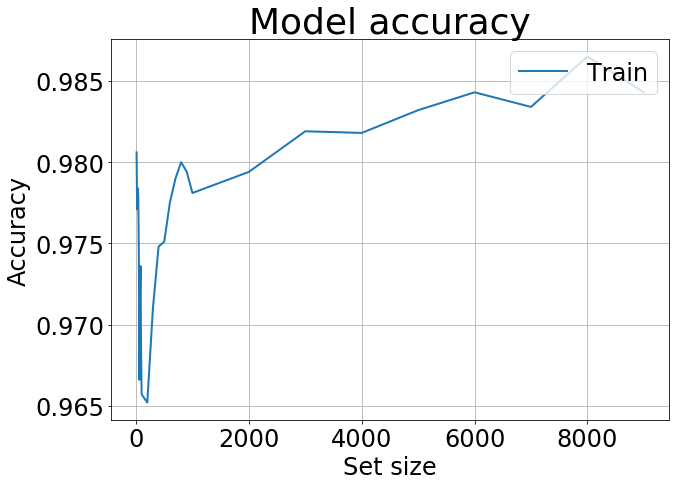

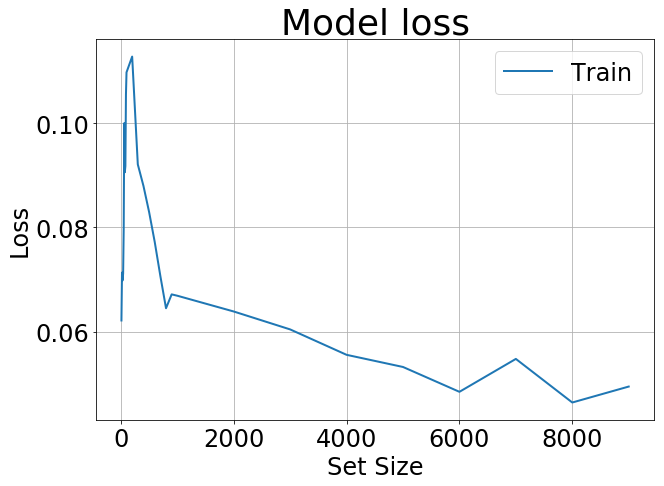

In [20]:
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_loss[:, 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Set size')
plt.legend(['Train'], loc='upper right')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_loss[:, 0])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Set Size')
plt.legend(['Train'], loc='upper right')
plt.grid()
plt.show()

## Добавим шум к нашим данным

In [21]:
def get_noisy_x(X_train, mean, stddev):
    n_imgs = X_train.shape[0]
    n_chan = X_train.shape[1]
    n_rows = X_train.shape[2]
    n_cols = X_train.shape[3]
    if stddev == 0:
        noise = np.zeros((n_imgs, n_chan, n_rows, n_cols))
    else:
        noise = np.random.normal(mean, stddev/255., 
                                     (n_imgs, n_chan, n_rows, n_cols))
    noisy_X = X_train + noise
    noisy_X = np.clip(noisy_X, 0., 1.)
    return noisy_X


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


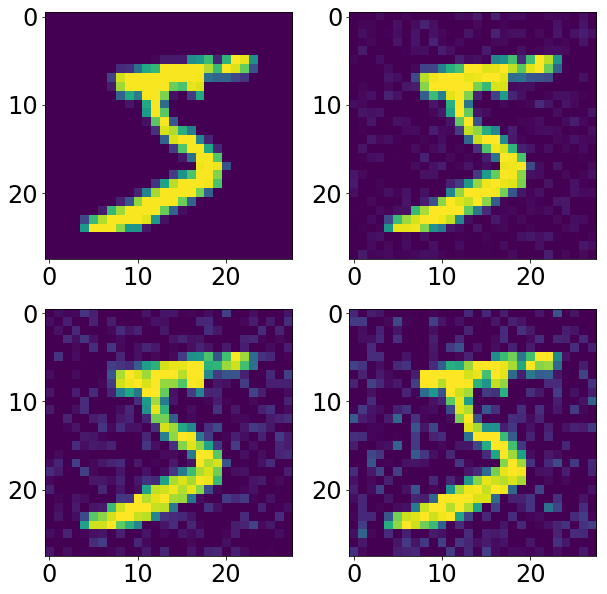

In [22]:
f = plt.figure(figsize=(10, 10))
for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    ax.imshow(get_noisy_x(X_train, mean=0, stddev=10*(i - 1))[0].reshape([28, 28]))
plt.show()

In [23]:
noises = [x for x in range(0, 80, 10)]
histories = []

In [24]:
for noise in noises:
    print(noise)
    histories.append(model.fit(get_noisy_x(X_train, mean=0, stddev=noise), y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_split=0.3))

0
10
20
30
40
50
60
70


In [25]:
print(histories)

[<keras.callbacks.History object at 0x1a1d27c470>, <keras.callbacks.History object at 0x1a1d3b7438>, <keras.callbacks.History object at 0x1a1d967e80>, <keras.callbacks.History object at 0x108c697b8>, <keras.callbacks.History object at 0x1a1dc279e8>, <keras.callbacks.History object at 0x1a1dc27860>, <keras.callbacks.History object at 0x1a1dc27a90>, <keras.callbacks.History object at 0x1a1dc27b38>]


## Построим графики

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


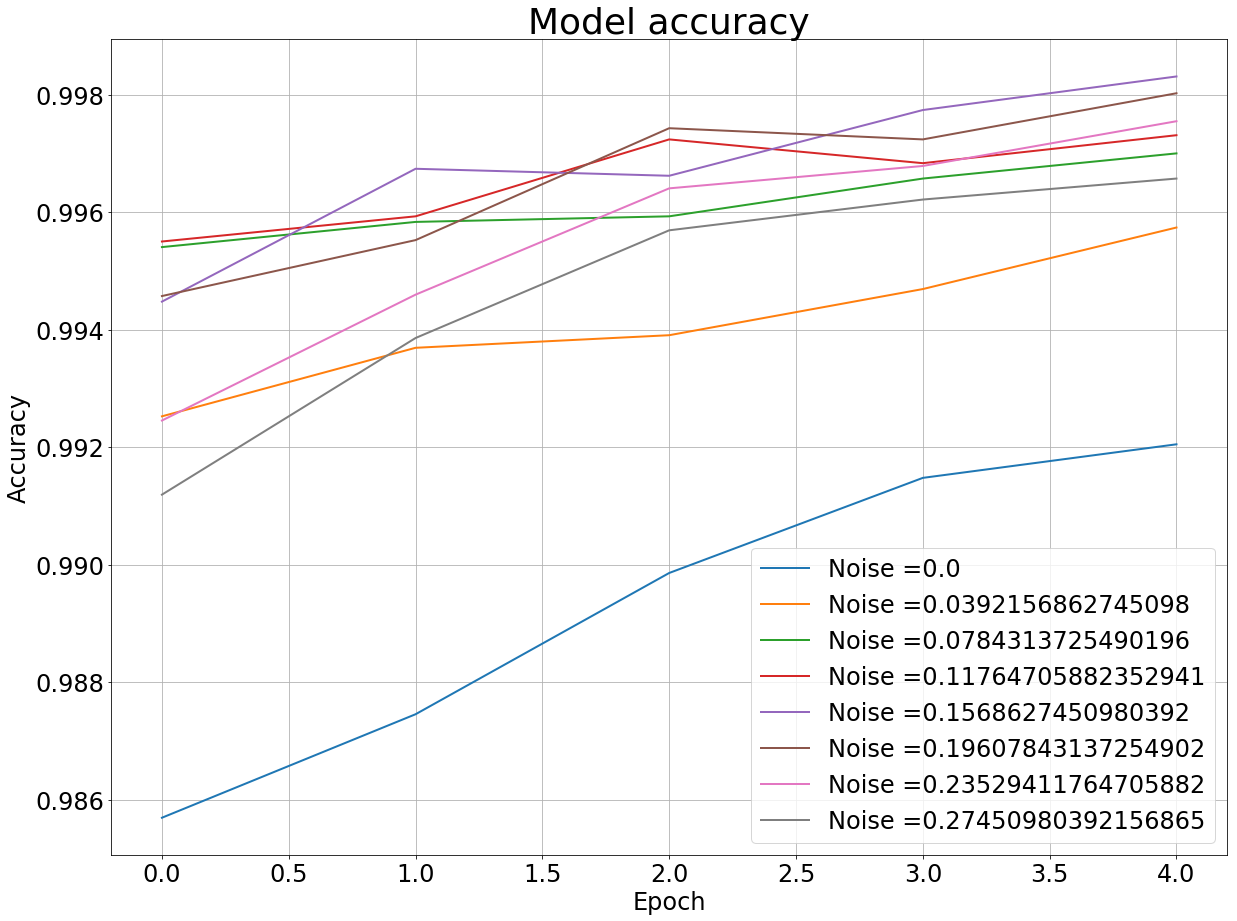

In [26]:
plt.figure(figsize=(20, 15))
i = 0
for history in histories:  
    plt.plot(history.history['acc'], label="Noise =" + str(noises[i]/ 255))
    i+= 1
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy')
plt.legend()
plt.grid()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


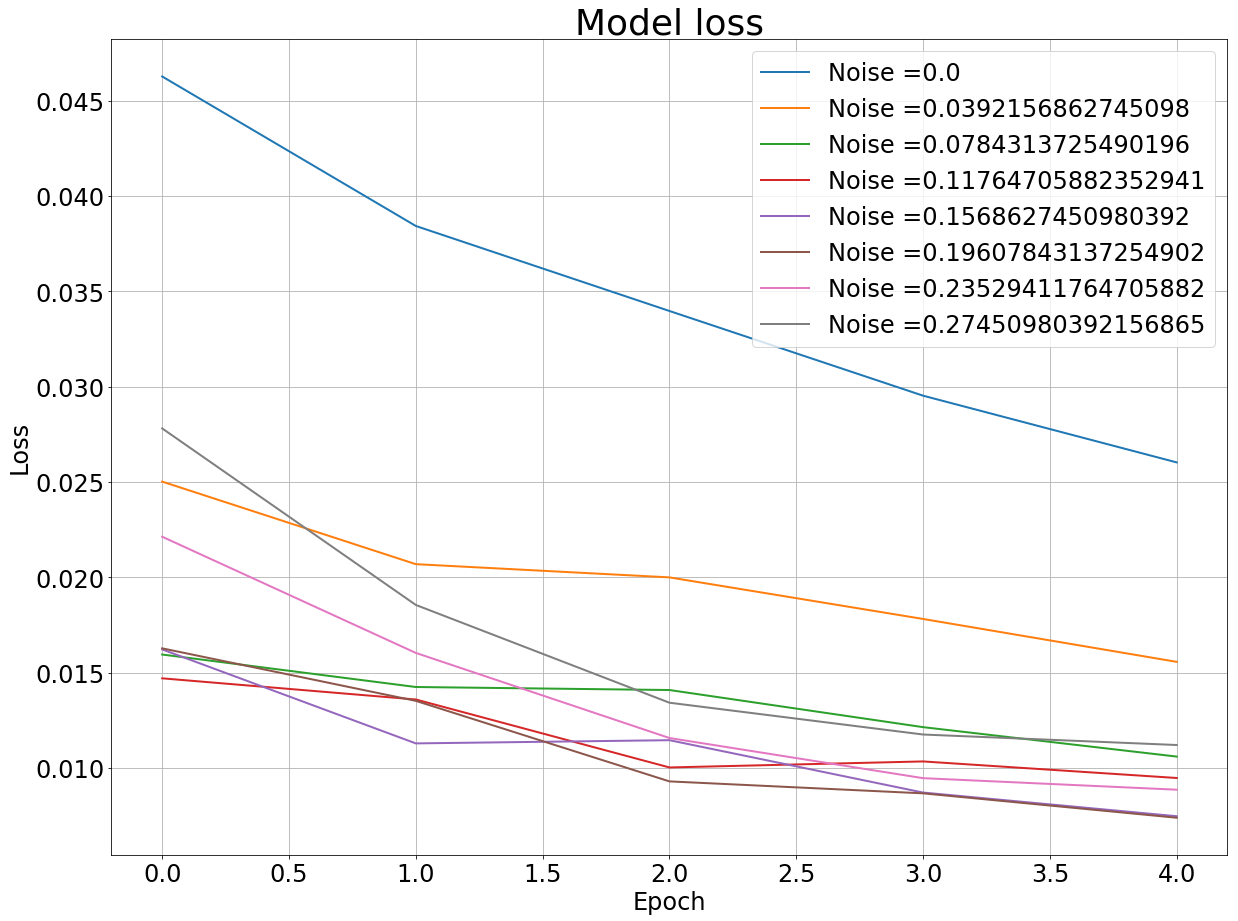

In [27]:
plt.figure(figsize=(20, 15))
i = 0
for history in histories:  
    plt.plot(history.history['loss'], label="Noise =" + str(noises[i]/255))
    i+= 1
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model loss')
plt.legend()
plt.grid()
plt.show()